Wprowadzenie

Celem poniższej pracy, jest rozwiązanie sudoku za pomocą algorytmu genetycznego na dwa rózne sposoby oraz porównanie ich efektywności ze sobą . Zasady roziwązywania sudoku są nastepujące:
 - pole gry składa się z dziewięciu bloków 3x3, które tworzą naszą planszę
 - na planszy niektóre pola mamy uzupełnione już liczbami (od 1-9) ilośc uzupelnionych pól różni się w zależności od poziomu trudności
 -celem gry jest wypełnienie wszystkich pól cyframi w taki sposób, aby w jednym bloku 3x3,oraz w każdej kolumnie i wierszu całej planszy każda liczba z 1-9 występowała tylko raz 

Rozdział 1 

1.1 Inicjalizacja planszy

Njapierw należy ustalić w jaki sposób będziemy kodować nasze sudoku. Będziemy je reprezentować jako tablicę dwuwymiarową, gdzie każada pojedyncza tablica będzie reprezenotwała jeden wiersz sudoku. Zera będą oznaczały puste miejsca, to jest pola, które należy uzupełnić. 

W celu przetestowania naszego algorytmu genetycznego rozwiązujecego sudoku na więcej niż jednej plnsy przygotujemy 10 różnych przykładowych sudoku na 5 różnych poziomach trudności: łatwy, średni, trudny, bardzo trudny, ekspert

Plansze sudoku z poziomu łatwy:

In [60]:
sudoku1 = [ [0,4,9,0,0,0,1,0,6],
            [0,0,1,0,8,0,0,0,0],
            [0,3,0,0,0,4,0,2,7],
            [2,0,5,4,7,8,3,0,1],
            [3,0,4,1,0,6,9,7,5],
            [6,0,7,0,9,0,0,0,0],
            [0,7,0,0,0,0,2,0,0],
            [0,0,3,2,0,1,0,0,0],
            [0,0,0,8,3,0,0,1,9]]



sudoku2 = [ [9,0,4,0,8,0,0,0,0],
            [0,0,0,7,0,0,0,9,0],
            [2,8,0,0,0,0,4,0,1],
            [0,0,0,5,1,0,0,4,6],
            [0,2,0,0,4,0,0,0,0],
            [0,0,5,8,0,0,9,0,7],
            [4,0,6,0,5,8,7,1,3],
            [5,7,2,0,3,9,0,8,4],
            [0,1,0,0,7,6,0,0,0]]

Plansze sudoku z poziomu średni:

In [61]:
sudoku3 = [[0,4,3,0,0,5,6,8,7],
           [0,6,0,0,2,0,0,1,0],
           [0,9,0,0,8,3,0,0,0],
           [0,0,0,0,0,0,3,4,0],
           [1,0,8,0,4,9,7,2,0],
           [0,0,0,2,5,0,0,0,0],
           [0,0,0,2,5,0,0,0,0],
           [0,8,6,1,0,2,0,0,0],
           [0,0,0,7,0,0,0,3,8],
           [0,0,7,0,0,0,0,0,0]]

sudoku4 = [[0,0,4,1,0,0,6,0,0],
           [2,0,0,0,9,8,7,0,0],
           [8,0,5,0,0,4,0,1,0],
           [3,0,0,0,2,7,5,0,0],
           [7,0,0,9,0,0,0,4,0],
           [4,0,0,6,0,3,0,9,0],
           [0,0,0,3,0,0,0,5,1],
           [0,0,0,0,0,0,9,0,0],
           [1,0,8,2,0,0,0,7,0]]

Plansze sudoku z poziomu trudny:

In [62]:
sudoku5 = [[0,5,0,0,0,0,9,4,0],
           [0,6,0,1,8,3,0,0,0],
           [0,0,7,0,0,0,0,0,0],
           [0,4,0,0,1,5,0,0,3],
           [0,0,8,0,0,9,0,0,4],
           [0,0,0,4,0,0,1,6,0],
           [0,0,0,0,0,0,0,0,0],
           [0,0,0,8,9,0,5,0,6],
           [8,1,0,0,7,0,0,0,0]]

sudoku6 = [[0,0,0,3,5,0,0,0,4],
           [0,3,0,4,0,9,0,0,7],
           [5,0,0,0,0,7,0,1,0],
           [1,0,0,0,4,0,0,0,0],
           [2,0,0,5,0,0,1,0,0],
           [0,9,6,0,2,8,0,0,0],
           [0,0,0,0,0,2,0,7,0],
           [0,6,0,0,0,0,0,0,9],
           [0,0,8,0,3,4,0,6,1]]

Plansz sudoku z poziomu bardzo trudny:

In [63]:
sudoku7 = [[0,0,0,0,0,7,0,0,6],
           [0,0,6,3,0,0,8,0,0],
           [0,0,1,2,0,5,4,0,0],
           [0,0,0,1,0,0,0,0,0],
           [0,6,0,0,0,9,0,0,0],
           [5,3,8,0,0,0,2,0,0],
           [0,0,0,4,0,0,0,6,0],
           [0,5,0,0,3,8,0,9,0],
           [0,0,7,0,0,0,0,0,2]]

sudoku8 = [[0,0,0,0,0,1,0,4,0],
           [0,0,1,0,0,9,0,0,6],
           [4,7,0,0,0,0,8,0,0],
           [0,0,0,1,0,0,4,7,0],
           [7,0,0,5,9,8,0,0,0],
           [0,1,0,7,0,0,0,3,0],
           [0,0,0,0,0,3,0,0,0],
           [0,0,2,0,0,0,0,0,0],
           [5,0,8,4,0,0,9,0,0]]

Plansze sudoku z poziomu ekspert:

In [203]:
sudoku9 = [
    [0,5,0,0,1,0,0,4,0],
    [2,0,0,0,0,0,0,3,0],
    [0,6,0,0,0,9,1,0,2],
    [7,0,0,0,5,0,6,0,1],
    [0,0,5,0,0,3,0,0,0],
    [0,0,0,0,0,0,4,0,0],
    [0,9,0,8,0,0,0,0,0],
    [6,0,0,0,3,0,5,0,7],
    [0,0,0,0,0,0,0,2,0]
           ]

sudoku10 = [[0,0,0,8,0,9,0,4,0],
            [0,6,0,0,0,0,0,0,0],
            [8,2,0,5,0,0,0,0,9],
            [0,0,4,7,0,0,0,0,0],
            [7,8,0,0,2,0,0,1,0],
            [0,0,6,0,0,0,0,0,8],
            [0,0,0,0,1,0,3,0,0],
            [5,9,0,2,0,0,0,0,4],
            [0,0,7,0,0,0,0,0,0]]

1.2 Zapis chromosomów

Z racji tego, że niektóre liczby w sudoku są już dane i chcemy mieć pewność, że nie zostaną one zmienione przez nasz algorytm, chromosmy będzimy kodować w postaci tablicy jednowymiarowej, gdzie tablica będzie miałą taka długość jak ilość pól w sudoku, które trzeba uzupełnić. Tablicę początkowo zaincjalizujemy z samymi zerami. W celu łatwiejszego przepisywania plansz sudoku na chromosomy napiszemy funkcję, która będzie to robiła oraz drugą, która będzie wpisywała rozwiązania z chromosomów do planszy sudoku, w celu sprawdzenia następnie czy zostały sepłnione zasady gry w sudoku

In [71]:
import copy

def transform_to_chromosome(sudoku):
    chromos = []
    for i in range(9):
        for j in range(9):
            if sudoku[i][j] == 0:
                chromos.append(float(sudoku[i][j]))
                
    return chromos


def transform_to_sudoku(chromos, sudoku):
    chromos = list(chromos)  
    sudoku_copy = copy.deepcopy(sudoku)


    for i in range(9):
        for j in range(9):
            if sudoku_copy[i][j] == 0:
                sudoku_copy[i][j] = float(chromos.pop(0))
        
    return sudoku_copy

1.3 Fintess Function
Musimy ustalić na jakiej zasadzie będizmey oceniać poprawność, kolejnych rozwiązań uzyskiwanych przez algorytm genetyczny. Będziemy posiadać dwa podstawowe kryteria:

     1. Będziemy sprawdzać czy w każdej kolumnie i wierszu liczby się nie powtarzają. Za każde powtórzenie dodajemy +1 do wyniku fitness function. 
     2. Będziemy sprawdzać czy w każdym kwadracie 3x3 liczby się nie powtarzają. 

     W obu przypadkach będizemy to sprawdzać w nas†epujący sposób:

     Bierzemy pierwszą liczbę w rzędzie/kolumnie i porównujemy ją z każdą występującą po niej liczbą. Jeżeli liczby są takie same to dodajemy +1. Następnie bierzemy drugą liczbę w koljnośći i porównujemy ją z każdą występującą po niej i powtarzamy tak, aż do sprawdzenia wszystkich rzędów i kolumn.

Na końcu otrzymany wynik mnożymy przez -1. Poprawnie rozwiązane sudoku, będize miało wynik 0. Im więćej błędów tym wynik będzie mniejszy.

In [260]:
import pygad
import time


gene_space = [1,2,3,4,5,6,7,8,9]

sudoku_test = [
[4,9,8,2,6,3,1,5,7],
[4,3,6,5,7,8,2,9,4],
[4,7,2,4,9,1,6,8,3],
[4,1,9,3,4,2,7,6,5],
[6,5,3,8,1,7,9,4,2],
[2,4,7,6,5,9,8,3,1],
[7,6,1,9,3,5,4,2,8],
[9,8,5,1,2,4,3,7,6],
[3,2,4,7,8,6,5,1,9]
]


def repetited_numbers(solution, lengthOfRow):
    if len(solution) == lengthOfRow ** 2:
        # reshape solution into a 2D list
        solution = [solution[i:i+lengthOfRow] for i in range(0, len(solution), lengthOfRow)]

    score = 0
    for i in range(lengthOfRow):
        # check for repeats in rows
        for j in range(lengthOfRow):
            for k in range(j+1, lengthOfRow):
                if solution[i][j] == solution[i][k]:
                    score += 1
        # check for repeats in columns
        for j in range(lengthOfRow):
            for k in range(j+1, lengthOfRow):
                if solution[j][i] == solution[k][i]:
                    score += 1
    return score


def check_square(solution):
    score = 0
    for i in range(0, 9, 3):  # iterate over the 3x3 squares
        for j in range(0, 9, 3):
            # check for repeats in the current square
            square = []
            for x in range(i, i+3):
                for y in range(j, j+3):
                    square.append(solution[x][y])
            score += repetited_numbers(square,3)  # call the repited_numbers_2 function
    return score

sudoku_board = sudoku1  

def fitness_func(solution, solution_idx):
    solution = transform_to_sudoku(solution, sudoku_board)
    score = repetited_numbers(solution, 9) + check_square(solution)
   
   
    return -score



   



12


1.4 Inicjalizacja parmetrów do algorytmu genetycznego

Żeby przetestować dla jakich parametrów, będziemy otrzymywać najlepsze rozwiazania w możliwie najkrotszym czasie, napiszemy funkcję która będize uruchomiała algorytm z róznymi parametrami oraz mierzyła czas trwania, a następnie sporządzimy wykresy w celu analizy.

W celu przeprowadzenia takiej analizy stworzymy funkcję test_parameters, którą będziemy uruchamiać dla wielu różnych kombinacji parametrów, a następnie zapiszemy te wyniki do pliku resuts.csv

In [193]:

fitness_function = fitness_func


import time 
import csv


def test_parameters(sol_per_pop,num_parents_mating,num_generations,keep_parents,parent_selection_type,crossover_type,mutation_type,mutation_percent_genes,stop_criteria,sudoku_board_name,file_name):
    start_time = time.time()
    num_generations = num_generations
    num_parents_mating = num_parents_mating
    keep_parents = keep_parents
    parent_selection_type = parent_selection_type
    crossover_type = crossover_type
    mutation_type = mutation_type
    mutation_percent_genes = mutation_percent_genes
    sol_per_pop = sol_per_pop
    num_genes = len(transform_to_chromosome(sudoku_board))
    ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       init_range_low=1,
                       init_range_high=9,
                       keep_parents=keep_parents,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)
    ga_instance.run()
    # ga_instance.plot_fitness()
    duration = time.time() - start_time
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    load_data(sol_per_pop,num_parents_mating,num_generations,keep_parents,parent_selection_type,crossover_type,mutation_type,mutation_percent_genes,num_genes, solution_fitness, duration,stop_criteria,sudoku_board_name,file_name)
    return sol_per_pop,num_parents_mating,num_generations,keep_parents,parent_selection_type,crossover_type,mutation_type,mutation_percent_genes,duration,solution_fitness,duration


def load_data(sol_per_pop,num_parents_mating,num_generations,keep_parents,parent_selection_type,crossover_type,mutation_type,mutation_percent_genes,num_genes, solution_fitness, duration,stop_criteria,sudoku_board_name,file_name):
    header = ["sol_per_pop", "num_parents_mating", "num_generations", "keep_parents", "parent_selection_type", "crossover_type", "mutation_type", "mutation_percent_genes", "num_genes", "solution_fitness", "duration","stop_criteria","sudoku_board_name"]
    with open(file_name, mode="a", newline="") as csv_file:
        writer = csv.writer(csv_file)
   
        if csv_file.tell() == 0:
            writer.writerow(header)

        data = [sol_per_pop, num_parents_mating, num_generations, keep_parents, parent_selection_type, crossover_type, mutation_type, mutation_percent_genes, num_genes, solution_fitness, duration,stop_criteria,sudoku_board_name]
        writer.writerow(data)
    



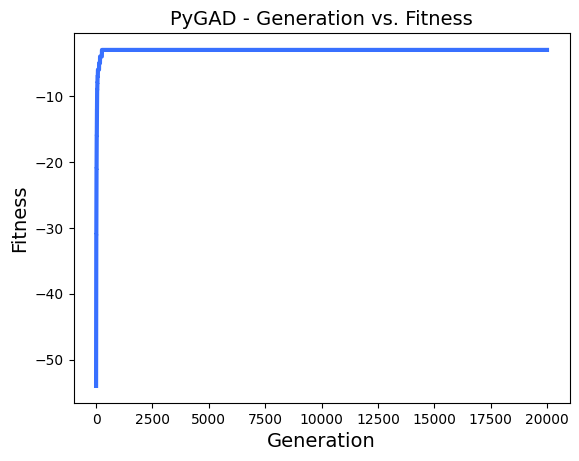

(400,
 200,
 20000,
 10,
 'sss',
 'single_point',
 'random',
 4,
 1023.8018500804901,
 -3,
 1023.8018500804901)

In [93]:
test_parameters(400, 200, 20000, 10, "sss", "single_point", "random", 4)

Sprawdzimy jak rozwój rozwiązań, będzie wyglądał dla różnych typów mutacji, ale już na mniejszej liczbie generacji, żeby zoptymalizować czas trwania prób.

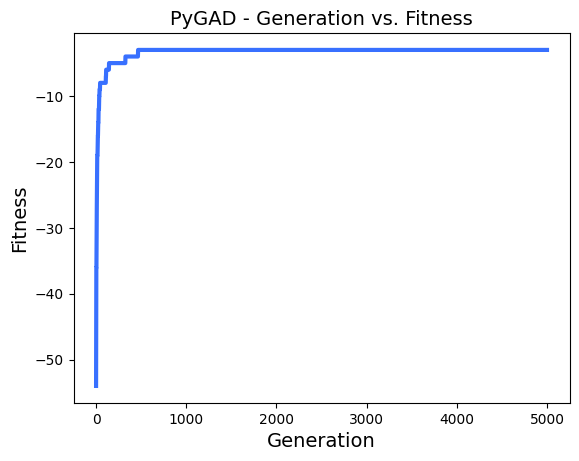

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'random',
 4,
 117.42271208763123,
 -3,
 117.42271208763123)

In [100]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "random", 4)

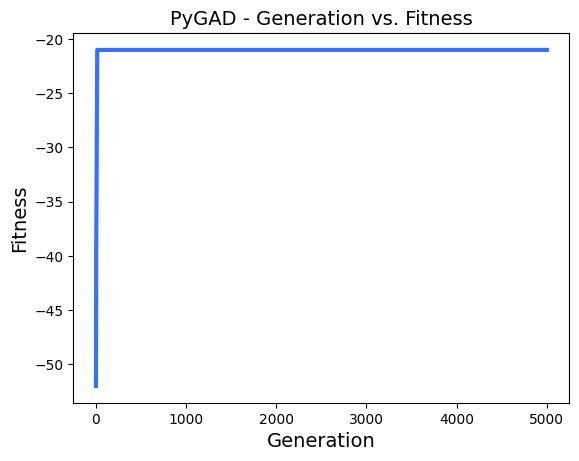

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'swap',
 4,
 79.40888404846191,
 -21,
 79.40888404846191)

In [103]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "swap", 4)

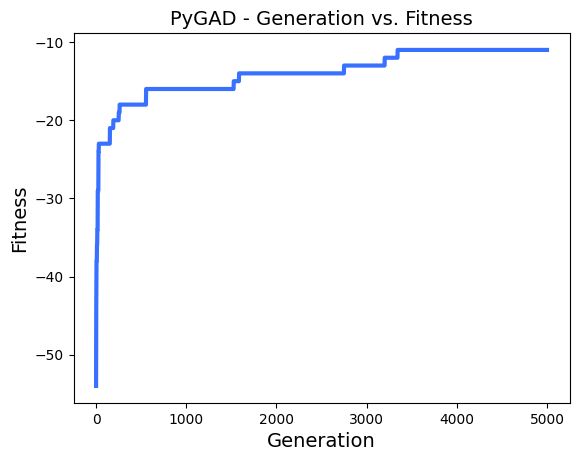

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'inversion',
 4,
 116.14902305603027,
 -11,
 116.14902305603027)

In [104]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "inversion", 4)

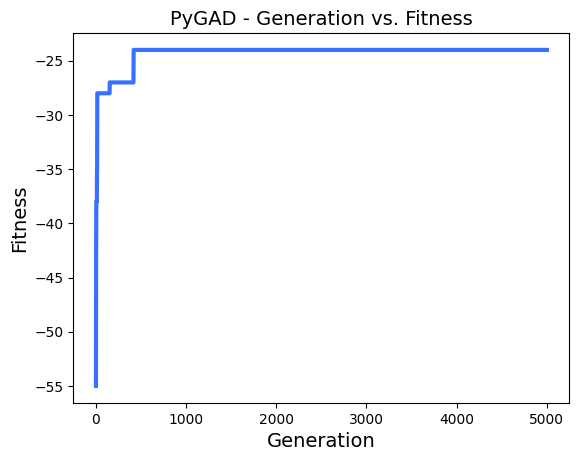

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'scramble',
 4,
 119.46561408042908,
 -24,
 119.46561408042908)

In [102]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "scramble", 4)

Po przeprowadzeniu kilku testów wygląda na to, że problmem jest brak zmienności. Przeprowadzimy te same testy jescze raz, ale z większym procentem mutacji

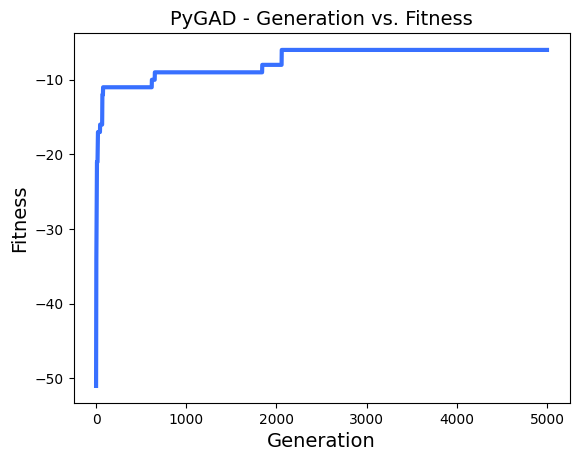

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'random',
 8,
 119.82731819152832,
 -6,
 119.82731819152832)

In [105]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "random", 8)

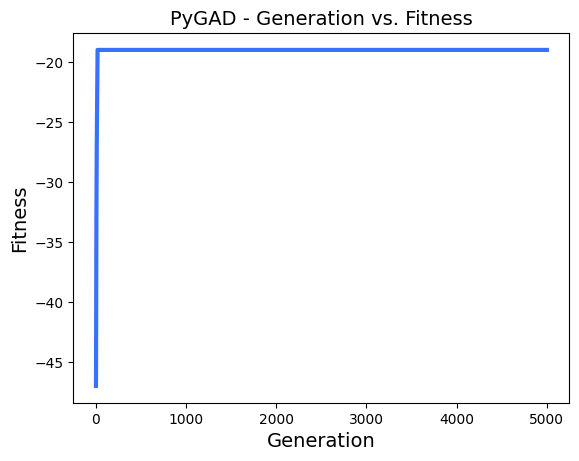

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'swap',
 8,
 91.36042618751526,
 -19,
 91.36042618751526)

In [106]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "swap", 8)

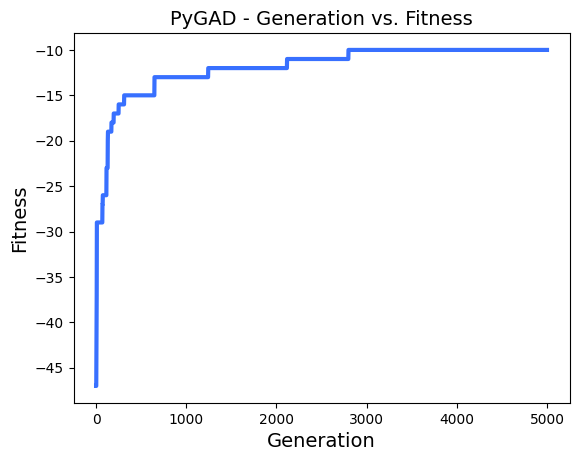

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'inversion',
 8,
 124.44585800170898,
 -10,
 124.44585800170898)

In [107]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "inversion", 8)

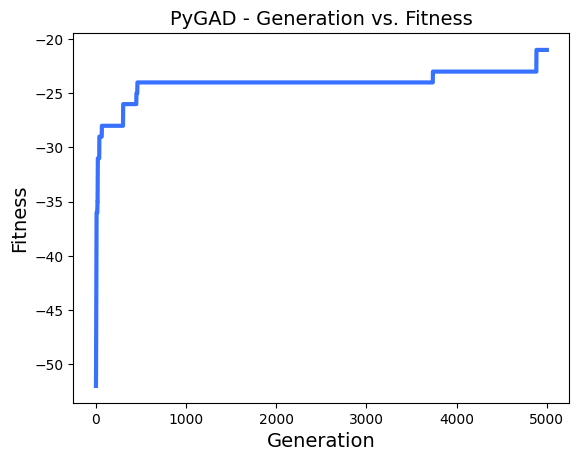

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'scramble',
 8,
 128.26891207695007,
 -21,
 128.26891207695007)

In [108]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "scramble", 8)

Z obu testów dla 4% szansy na mutację oraz 8% wyniki sa natępująe:
    1. Najgorzej wypadają metody: scramble i swap
    2.  Problemem wydaje się to, że rozwiązania bardzo długo się nie rozwijają. Szybko osiągają dany wynik i w większości przypadków do samego końca na nim pozostają.
    3. Za każdym razem najlepiej wypadała mutacja random z wynikami -3 i -6. 
    4. Za każdym razem pod względem mutacji -  nie pozostawaniu przez cały czas z takim samym wynkiem najlepiej wygląda mutacja inversion, jednak osiągnęła ona wyniki gorsze od random.


Następne testy przeprowadzimy już tylko dla tych dwóch mutacji random i inversion. Zwiększymy znacząco szansę na mutację i zobaczymy czy poprawi to wyniki tych funkcji.


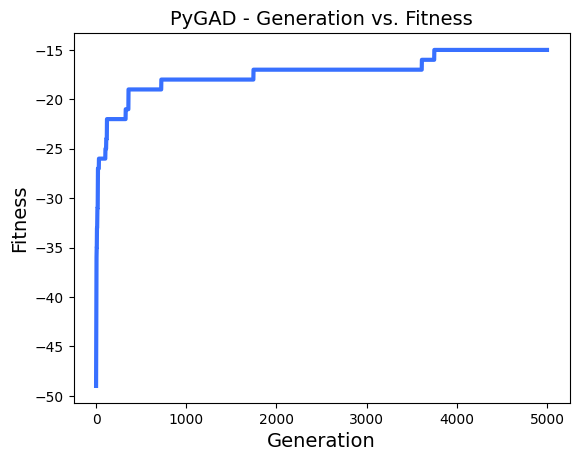

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'random',
 15,
 124.74702215194702,
 -15,
 124.74702215194702)

In [111]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "random", 15)

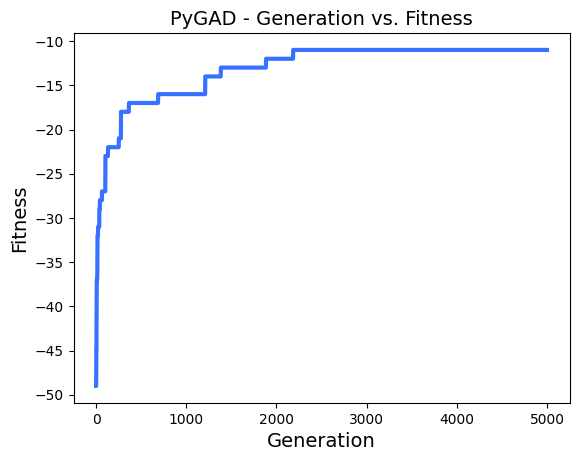

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'inversion',
 15,
 119.06359910964966,
 -11,
 119.06359910964966)

In [112]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "inversion", 15)

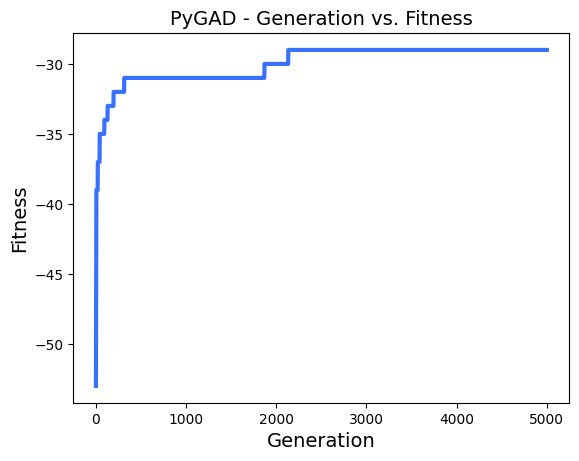

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'random',
 30,
 131.307382106781,
 -29,
 131.307382106781)

In [109]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "random", 30)

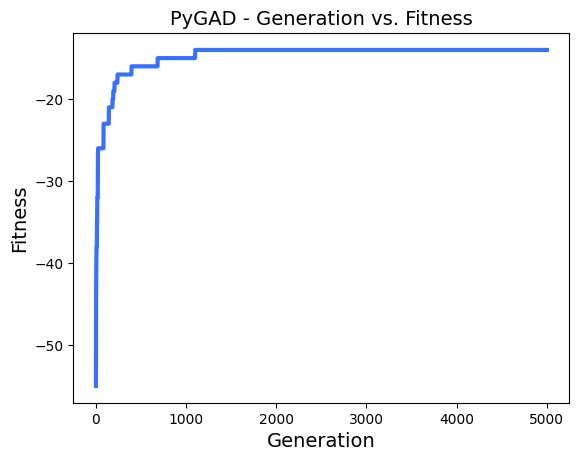

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'inversion',
 30,
 122.14960813522339,
 -14,
 122.14960813522339)

In [110]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "inversion", 30)

Jak widać, żadne z rozwiązań nie otrzymało wyniku 0, dlatego przeprowadzę serię testów zmieniając różne parametry, a następnie przenalizuję wyniki, żeby przetestować tak dużą liczbę kombinacji z racji zaobsrwowanej tendencji ustawię w wywołaniu algorytmu warunek, że jeżeli przez daną liczbę pokoleń, wynik fitness function się nie poprawi, to zakończy się wykonywanie algorytmu.

Funkcja test_parameters została zmodyfikowana tak, że teraz dodatkowo przyjmuje parametr stop_criteria oraz zapisuje parametry z którymi zostałą wywołana, fitness score oraz stop criteria w pliku o nazwie results_v2.csv.

Żeby przeanalizować wyniki sprawdzimy czy jakieś parametry dały wynik 0.

In [151]:
import pandas as pd
filename = "results_v2.csv"


def analize_results(filename):
    df = pd.read_csv(filename)
    filtered_df = df[(df['solution_fitness'] == 0 & df['stop_criteria'] == "saturate_50")]
    filtered_df_2 = df[(df['solution_fitness'] >= -10  & df['stop_criteria'] == "saturate_50")]

    params_list = filtered_df[['sol_per_pop', 'num_parents_mating', 'num_generations', 'keep_parents', 'parent_selection_type', 'crossover_type', 'mutation_type', 'mutation_percent_genes', 'num_genes', 'solution_fitness','duration', 'stop_criteria']].values.tolist()
    params_list_2 = filtered_df_2[['sol_per_pop', 'num_parents_mating', 'num_generations', 'keep_parents', 'parent_selection_type', 'crossover_type', 'mutation_type', 'mutation_percent_genes', 'num_genes', 'solution_fitness','duration', 'stop_criteria']].values.tolist()

    print("Solution where fitness is 0",params_list)
    print("Number of fitness solutions: >-10 :", len(params_list_2))

analize_results(filename)


Solution where fitness is 0 [[500, 25, 5000, 10, 'rank', 'uniform', 'random', 4, 45, 0, 10.001945972442629, 'saturate_50']]
Number of fitness solutions: >-10 : 107


Okazuje się, że na prawie 800 przeprowadzonych testów tylko jedne parametry zwrócily wynik 0, czyli rozwiązane sudoku teraz przeprowadzimy testy czy dla tych konkretnych parametrów, żeby sprawdzić czy uda nam się znowu osiągnąc zero.

In [144]:
for i in range(100):
    i+=1
    test_parameters(500, 25, 5000, 10, 'rank', 'uniform', 'random', 4,'saturate_50')

In [152]:
filename_2 = "best_parameters.csv"
analize_results(filename_2)

Solution where fitness is 0 [[500, 25, 5000, 10, 'rank', 'uniform', 'random', 4, 45, 0, 11.148038864135742, 'saturate_50']]
Number of fitness solutions: >-10 : 100


Jak widać powyżej wszystkie 100 testów było wynikami różniącymi się tylko o 10 lub mniej od finalnego rozwiązania oraz znowu udało nam się jeden raz osiągnąć zero. Biorąc pod uwagę te rezultaty uruchomimy algorytm jeszcze 5 razy, tylko tym razem dla 10 000 generacji, z warunkiem wcześniejszego zatrymania tylko wtedy, kiedy osiąągniemy 0 z fitness function.

In [154]:
for i in range(4):
    i+=1
    test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"reach_0")

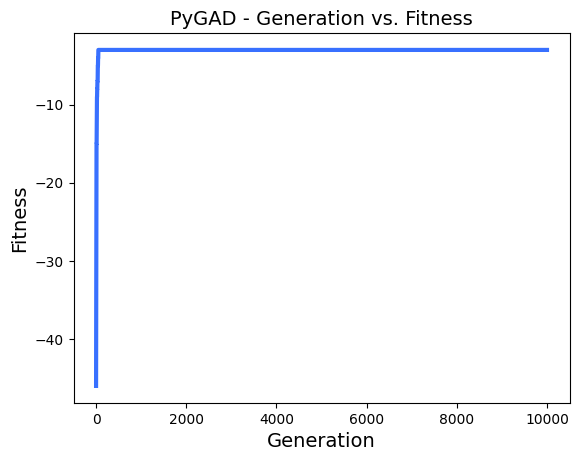

In [156]:
test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"reach_0")

Po tak otrzymachy wynikach oraz po przeczytaniu prac naukowych w internecie, wydawało się, że najlepszym sposobem na rozwiązaniem sudoku jest puszczenie algorytmu genetycznego, jeżeli po iluś pokoleniach nie otrzymamy poprawy i utkniemy w lokalnym minimum, to restartujemy cały algorytm i powtarzamy proces tak długo, aż w końcu otrzymamy zero. Po przeprowadzeniu takiego testu, po 25 minutach musiałam go przerwać, ponieważ w ciąż nie udało się otrzymać zera, a było to dopiero puszczane dla sudoku na najłatwiejszym poziomie i cięzko przeiwdizieć ile jeszcze by trwało, aż do osiągnięcia zera. Dodatkowym minusem takiego rozwiązania jest to, że przy restarcie algorytmu nie korzystamy już z dotychczas osiągnoętych postępów, tylko zaczynamy wszystko od początku, i to jak szybko osiągniemy zero przy takim pośtępowaniu staję się bardziej losowe. Jednak na podstawie poprzednich testów wiemy, że da się osiągnąć zero.

Poniżej przedstawiam jak prezenoują się wyniki dla tego eksperymentu (który zostałl przerwany po 25 przeprowadzonego ),dla planszy sudoku1. Wyniki zostały zapisane w pliku restarts.csv. 

W calu przeprowadzenia analizy efektywności algorytmy dla każdego z 5 poziomów sudoku. Puścimy algorytm 100 razy dla każdego poziomu, wybierając losowo jaką planszę na danym poziomie będize rozwiązywał. Następnie zestawimy wyniki na wykresach. Z racji zaobserowwanej tendencji do dość szybkiego wpadania w lokalne minimum, żeby przeprowadzić takie testy ustawiamy parametr stop criteria na 50 pokoleń, w których nie doszło do poprawy wyniku. W celu sprawdzenia czy może większa liczba jednostek w pokoleniu wpłynie znacząco na trudniejsze poziomy przeprowadzimy testy dla wielkości  500 oraz 1500 jednostek w populacji.

In [191]:
import random

def random_number():
    return random.randint(0, 1)

for i in range(100):
    i +=1
    sudokus = [sudoku1, sudoku2, sudoku3]
    sudokus_names = ["sudoku1", "sudoku2"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num])
   


In [192]:
for i in range(100):
    i +=1
    sudokus = [sudoku1, sudoku2, sudoku3]
    sudokus_names = ["sudoku1", "sudoku2"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num])
   



In [194]:
file_name = "sudoku_3_4.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku3, sudoku4]
    sudokus_names = ["sudoku3", "sudoku4"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   


In [205]:
file_name = "sudoku_3_4.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku3, sudoku4]
    sudokus_names = ["sudoku3", "sudoku4"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

In [195]:
file_name = "sudoku_5_6.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku5, sudoku6]
    sudokus_names = ["sudoku5", "sudoku6"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

In [206]:
file_name = "sudoku_5_6.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku5, sudoku6]
    sudokus_names = ["sudoku5", "sudoku6"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

In [196]:
file_name = "sudoku_7_8.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku7, sudoku8]
    sudokus_names = ["sudoku7", "sudoku8"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

In [207]:
file_name = "sudoku_7_8.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku7, sudoku8]
    sudokus_names = ["sudoku7", "sudoku8"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

In [204]:
file_name = "sudoku_9_10.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku9, sudoku10]
    sudokus_names = ["sudoku9", "sudoku10"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

In [ ]:
file_name = "sudoku_9_10.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku9, sudoku10]
    sudokus_names = ["sudoku9", "sudoku10"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

ZINTERPRETOWAĆ I PRZEDSTAWIĆ WYKRESY!!!

2. Rozdział 2

2.1 Incjalizacja planszy i chromosomów

W tej implementacji przedstaimy sudoku jako graf i podejdziemy do rozwiązywania sudoku jak do rozwiązywania problemy kolorowania grafów.Podstawowe ustalenia:
    1.Graf będzie miał 81 wierzchołkó, gdzie każdy wierzchołek będize odpowiadał jednej komórce na planszy sudoku.
    2. Wierzchołki będą sąsiadować wtedy i tylko wtedy, kiedy odpowiadające im komórki na planszy sudoku znajdują się w tym samym rzędie, kolumnie lub wierszu
    3. Sudoku wypełnia się liczbami od 1-9, a więc będizmey porzebować 9 kolorów, żeby wypełnić graf w taki sposób, żeby żadne sąsiadujące ze sobą wierzchołki nie miały tego samego koloru.
    4. Sudoku ma już niektóre pola wypełnione, więc wypełnione pola uzupełnimy od razu przypisując im odpowiednie kolory, korespondujące do liczby wpisanej w dane pole.



W celu zapisu sudoku w postaci grafu skorzystamy z biblioteki networkx. Zmienimy zapisy plansz sudoku, żeby skorzystac z np.array, ale nie zmienimy w żadne sposbób samych wartości w planszy, w aięc dalje bedziemy rozwiązywać tych samych 10 sudoku. Nas†ępnie za pomocą funkcji przekształcimy ten zapis do postaci grafów.



In [292]:
import numpy as np
sudoku_1 = np.array( [ [0,4,9,0,0,0,1,0,6],
            [0,0,1,0,8,0,0,0,0],
            [0,3,0,0,0,4,0,2,7],
            [2,0,5,4,7,8,3,0,1],
            [3,0,4,1,0,6,9,7,5],
            [6,0,7,0,9,0,0,0,0],
            [0,7,0,0,0,0,2,0,0],
            [0,0,3,2,0,1,0,0,0],
            [0,0,0,8,3,0,0,1,9]])




sudoku_2 = np.array([ [9,0,4,0,8,0,0,0,0],
            [0,0,0,7,0,0,0,9,0],
            [2,8,0,0,0,0,4,0,1],
            [0,0,0,5,1,0,0,4,6],
            [0,2,0,0,4,0,0,0,0],
            [0,0,5,8,0,0,9,0,7],
            [4,0,6,0,5,8,7,1,3],
            [5,7,2,0,3,9,0,8,4],
            [0,1,0,0,7,6,0,0,0]])


sudoku_3 =np.array( [[0,4,3,0,0,5,6,8,7],
           [0,6,0,0,2,0,0,1,0],
           [0,9,0,0,8,3,0,0,0],
           [0,0,0,0,0,0,3,4,0],
           [1,0,8,0,4,9,7,2,0],
           [0,0,0,2,5,0,0,0,0],
           [0,0,0,2,5,0,0,0,0],
           [0,8,6,1,0,2,0,0,0],
           [0,0,0,7,0,0,0,3,8],
           [0,0,7,0,0,0,0,0,0]])

sudoku_4 = np.array([[0,0,4,1,0,0,6,0,0],
           [2,0,0,0,9,8,7,0,0],
           [8,0,5,0,0,4,0,1,0],
           [3,0,0,0,2,7,5,0,0],
           [7,0,0,9,0,0,0,4,0],
           [4,0,0,6,0,3,0,9,0],
           [0,0,0,3,0,0,0,5,1],
           [0,0,0,0,0,0,9,0,0],
           [1,0,8,2,0,0,0,7,0]])


sudoku_5 =np.array( [[0,5,0,0,0,0,9,4,0],
           [0,6,0,1,8,3,0,0,0],
           [0,0,7,0,0,0,0,0,0],
           [0,4,0,0,1,5,0,0,3],
           [0,0,8,0,0,9,0,0,4],
           [0,0,0,4,0,0,1,6,0],
           [0,0,0,0,0,0,0,0,0],
           [0,0,0,8,9,0,5,0,6],
           [8,1,0,0,7,0,0,0,0]])

sudoku_6 = np.array([[0,0,0,3,5,0,0,0,4],
           [0,3,0,4,0,9,0,0,7],
           [5,0,0,0,0,7,0,1,0],
           [1,0,0,0,4,0,0,0,0],
           [2,0,0,5,0,0,1,0,0],
           [0,9,6,0,2,8,0,0,0],
           [0,0,0,0,0,2,0,7,0],
           [0,6,0,0,0,0,0,0,9],
           [0,0,8,0,3,4,0,6,1]])

sudoku_9 = np.array([
    [0,5,0,0,1,0,0,4,0],
    [2,0,0,0,0,0,0,3,0],
    [0,6,0,0,0,9,1,0,2],
    [7,0,0,0,5,0,6,0,1],
    [0,0,5,0,0,3,0,0,0],
    [0,0,0,0,0,0,4,0,0],
    [0,9,0,8,0,0,0,0,0],
    [6,0,0,0,3,0,5,0,7],
    [0,0,0,0,0,0,0,2,0]
           ])

sudoku_10 = np.array([[0,0,0,8,0,9,0,4,0],
            [0,6,0,0,0,0,0,0,0],
            [8,2,0,5,0,0,0,0,9],
            [0,0,4,7,0,0,0,0,0],
            [7,8,0,0,2,0,0,1,0],
            [0,0,6,0,0,0,0,0,8],
            [0,0,0,0,1,0,3,0,0],
            [5,9,0,2,0,0,0,0,4],
            [0,0,7,0,0,0,0,0,0]])

Tak będzie prezentowała się wizualizacja sudoku_1 jako grafu, oraz w postaci dictionary.

In [303]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx




def represnt_as_graph_image(sudoku):
    n = 3
    G = nx.sudoku_graph(n)
   
    mapping = dict(zip(G.nodes(), sudoku.flatten()))
    pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))
    # pos = {node: (x, -y) for (node, (x, y)) in pos.items()}
    # print(pos)
    # we map the nodes 1-9 to a colormap
    low, *_, high = sorted(mapping.values())
    norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

    plt.figure(figsize=(6, 6))
    nx.draw(
        G,
        labels=mapping,
        pos=pos,
        with_labels=True,
        node_color=[mapper.to_rgba(i) for i in mapping.values()],
        width=1,
        node_size=900,
    )


    plt.show()
  
  

def represent_as_coordinates(sudoku):
    coordinates = {}
    for i in range(len(sudoku)):
        for j in range(len(sudoku[i])):
            coordinates[(i,j)] = sudoku[i][j]
    return coordinates


print(represent_as_coordinates(sudoku_1))
# represnt_as_graph_image(sudoku_1)

sudoku_1 = np.array( [ [0,4,9,0,0,0,1,0,6],
            [0,0,1,0,8,0,0,0,0],
            [0,3,0,0,0,4,0,2,7],
            [2,0,5,4,7,8,3,0,1],
            [3,0,4,1,0,6,9,7,5],
            [6,0,7,0,9,0,0,0,0],
            [0,7,0,0,0,0,2,0,0],
            [0,0,3,2,0,1,0,0,0],
            [0,0,0,8,3,0,0,1,9]])


{(0, 0): 0, (0, 1): 4, (0, 2): 9, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 1, (0, 7): 0, (0, 8): 6, (1, 0): 0, (1, 1): 0, (1, 2): 1, (1, 3): 0, (1, 4): 8, (1, 5): 0, (1, 6): 0, (1, 7): 0, (1, 8): 0, (2, 0): 0, (2, 1): 3, (2, 2): 0, (2, 3): 0, (2, 4): 0, (2, 5): 4, (2, 6): 0, (2, 7): 2, (2, 8): 7, (3, 0): 2, (3, 1): 0, (3, 2): 5, (3, 3): 4, (3, 4): 7, (3, 5): 8, (3, 6): 3, (3, 7): 0, (3, 8): 1, (4, 0): 3, (4, 1): 0, (4, 2): 4, (4, 3): 1, (4, 4): 0, (4, 5): 6, (4, 6): 9, (4, 7): 7, (4, 8): 5, (5, 0): 6, (5, 1): 0, (5, 2): 7, (5, 3): 0, (5, 4): 9, (5, 5): 0, (5, 6): 0, (5, 7): 0, (5, 8): 0, (6, 0): 0, (6, 1): 7, (6, 2): 0, (6, 3): 0, (6, 4): 0, (6, 5): 0, (6, 6): 2, (6, 7): 0, (6, 8): 0, (7, 0): 0, (7, 1): 0, (7, 2): 3, (7, 3): 2, (7, 4): 0, (7, 5): 1, (7, 6): 0, (7, 7): 0, (7, 8): 0, (8, 0): 0, (8, 1): 0, (8, 2): 0, (8, 3): 8, (8, 4): 3, (8, 5): 0, (8, 6): 0, (8, 7): 1, (8, 8): 9}


Taka reprezetacja za pomocą kodu oznacza:
    - tuple z dowma liczbami oznaczaja wpółrzędne (numer wiersza,numer kolumny) na planszy sudoku gdzie pierwszy wiersz planszy reprezentowany jest przez współrzędne (0,0) do (0,8), drugi wiersz przez (1,0) do (1,8) itd
       
     
Dana reprezentacja sudoku za pomocą kodu, będzie również naszą reprezentacją chromosomów

Teraz należy się zastanowić jak sprawiimy, aby już wypełnione pola w sudoku nie zostały zmienione, przez nasz algorytm genetyczny. Zrobimy to po przez stworzenie listy (fixed_places), która będzie tuple ze współrzędnymi tych miejsc na planszy. 

In [304]:
def find_fixed_places(sudoku, coordinates):
    nonempty_cells = []
    for coord in coordinates:
        x, y = coord
        if sudoku[x][y] != 0:
            nonempty_cells.append(coord)
    return nonempty_cells

find_fixed_places(sudoku_1,represent_as_coordinates(sudoku_1))



[(0, 1),
 (0, 2),
 (0, 6),
 (0, 8),
 (1, 2),
 (1, 4),
 (2, 1),
 (2, 5),
 (2, 7),
 (2, 8),
 (3, 0),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 8),
 (4, 0),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 0),
 (5, 2),
 (5, 4),
 (6, 1),
 (6, 6),
 (7, 2),
 (7, 3),
 (7, 5),
 (8, 3),
 (8, 4),
 (8, 7),
 (8, 8)]

2.2 Fitness function

Kolejnym etapem będzie napisane funckji, która będize oceniała poprawność rozwiązania. Naszym podstawowym kryterium w tej funkcji będize to ile sąsiadujących ze sobą wierzchołków "ma ten sam kolor" czyli w naszym wypadku ile razy została przypisana ta sama liczba z przedizału od 1-9 dla sąsiadujących wierzchołków